First 10 rows of the dataset:
         Date Building_ID HVAC_ID  Temperature  Humidity System_Status
0  2024-01-01        B001   HV004          NaN       NaN   Maintenance
1  2024-01-02         NaN   HV003         21.6      42.7   Maintenance
2  2024-01-03        B002   HV002         21.0      47.4            On
3  2024-01-04        B001   HV001         20.7      49.6           Off
4  2024-01-05         NaN   HV001         20.1      42.5           Off
5  2024-01-06        B003   HV002         21.2      45.8           Off
6  2024-01-07        B002   HV001         20.2      45.9   Maintenance
7  2024-01-08         NaN   HV001         22.5      45.7           Off
8  2024-01-09        B001   HV003         22.8      42.2           Off
9  2024-01-10        B002   HV001         19.9      49.5           Off

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------     

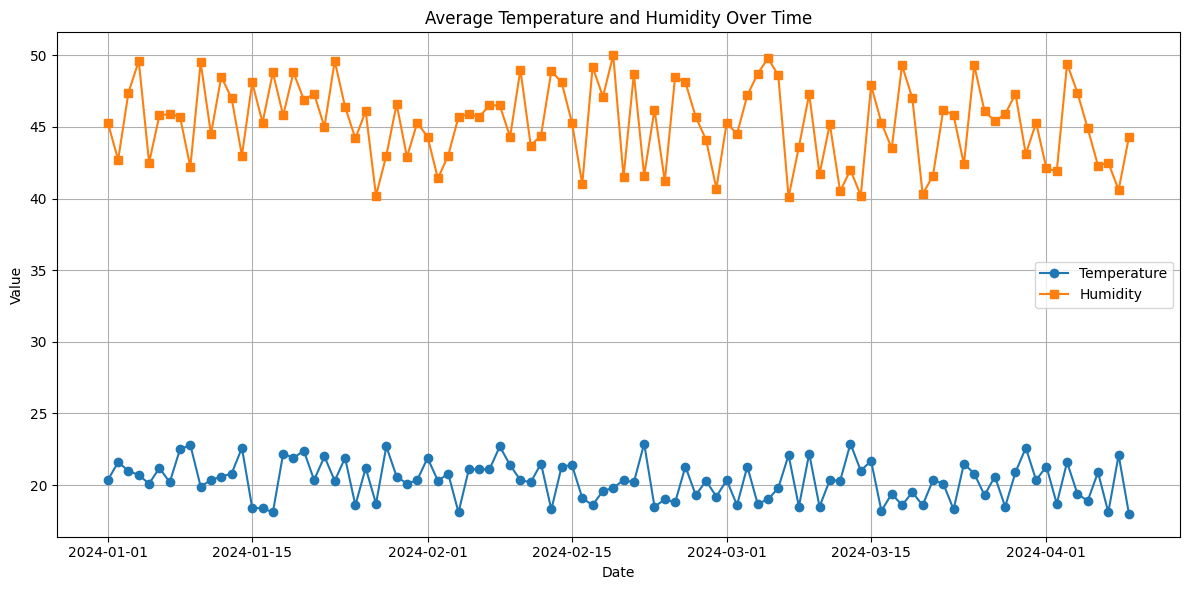

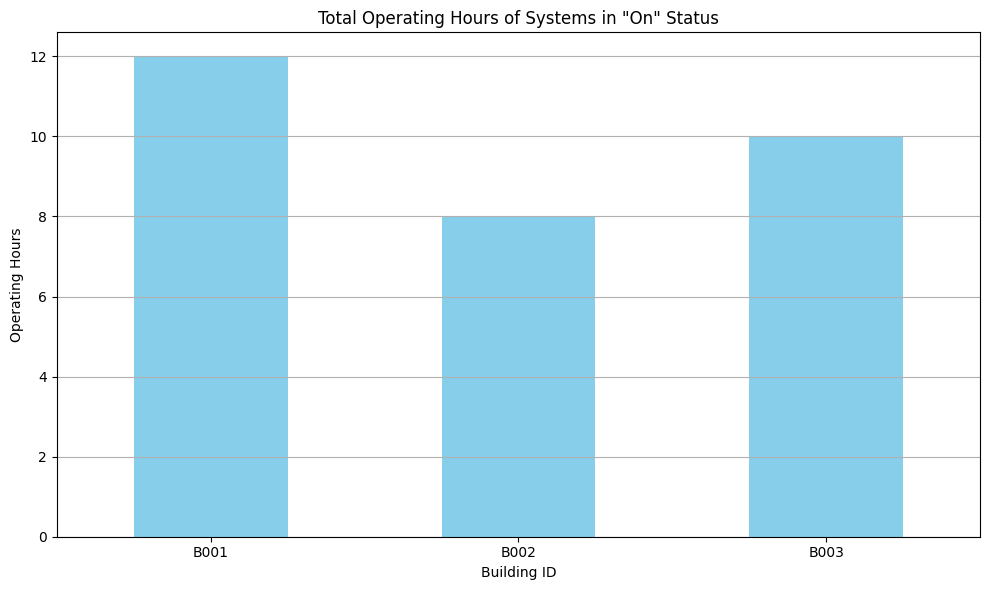

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Loading and Inspection:
# Load the dataset into a Pandas DataFrame.
df = pd.read_csv('sampleData.csv')

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))

# Print a summary of the dataset
print("\nSummary of the dataset:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# 2. Data Cleaning:
# Handle missing values in Temperature and Humidity columns
# Checking for missing values
missing_values = df[['Temperature', 'Humidity']].isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Handling missing values by filling with mean
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)

# Verify if missing values were handled
missing_values_after = df[['Temperature', 'Humidity']].isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

# Check for duplicate records
duplicate_rows = df[df.duplicated()]
print("\nDuplicate records:")
print(duplicate_rows)

#  Remove duplicate records
df.drop_duplicates(inplace=True)

# 3. Data Analysis:
# Calculate average temperature and humidity for each building
avg_temp_humidity = df.groupby('Building_ID').agg({'Temperature': 'mean', 'Humidity': 'mean'})
print("\nAverage temperature and humidity for each building:")
print(avg_temp_humidity)

# Determine the percentage of time each HVAC system was in "On" status
status_counts = df['System_Status'].value_counts(normalize=True) * 100
print("\nPercentage of time each HVAC system status:")
print(status_counts)

# 4. Data Visualization
df['DateTime'] = pd.to_datetime(df['Date'])
# Calculate average temperature and humidity over time
avg_temp_humidity_over_time = df.groupby('DateTime').agg({'Temperature': 'mean', 'Humidity': 'mean'}).reset_index()
# Create a line plot for temperature and humidity over time
plt.figure(figsize=(12, 6))
plt.plot(avg_temp_humidity_over_time['DateTime'], avg_temp_humidity_over_time['Temperature'], label='Temperature', marker='o')
plt.plot(avg_temp_humidity_over_time['DateTime'], avg_temp_humidity_over_time['Humidity'], label='Humidity', marker='s')
plt.title('Average Temperature and Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate a bar chart comparing total operating hours of HVAC systems in "On" status across different buildings
on_status_hours = df[df['System_Status'] == 'On'].groupby('Building_ID')['System_Status'].count()

plt.figure(figsize=(10, 6))
on_status_hours.plot(kind='bar', color='skyblue')
plt.title('Total Operating Hours of Systems in "On" Status')
plt.xlabel('Building ID')
plt.ylabel('Operating Hours')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()